In [133]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from keras.utils import np_utils
np.random.seed(10)

In [134]:
from keras.datasets import mnist

In [135]:
(x_train_img , y_train_label) , (x_test_img, y_test_label)= mnist.load_data()

In [136]:
print(x_train_img.shape)
print(y_train_label.shape)
print(x_test_img.shape)
print(y_test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [137]:
import matplotlib.pyplot as plt
def plot_img(img):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(img, cmap='binary')
    plt.show()

In [138]:
def plot_img_label_prediction(imgs, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : 
        num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(imgs[idx], cmap='binary')
        title= "L= " + str(labels[idx])
        if len(prediction)>0 :
            title += ", predict= " + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

In [139]:
x_train = x_train_img.reshape(60000, 784).astype('float32')
x_test = x_test_img.reshape(10000, 784).astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [140]:
x_train_normalize = x_train/255
x_test_normalize = x_test/255

In [141]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [142]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [143]:
model = Sequential()

In [144]:
model.add(Dense(units=1000, input_dim=784, kernel_initializer = 'normal', activation='relu'))

In [145]:
model.add(Dropout(0.5))

In [147]:
model.add(Dense(units=1000, kernel_initializer = 'normal', activation='relu'))

In [148]:
model.add(Dropout(0.5))

In [149]:
model.add(Dense(units=10, kernel_initializer = 'normal', activation = 'softmax'))

In [150]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [151]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
train_history = model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3677 - accuracy: 0.8855 - val_loss: 0.1317 - val_accuracy: 0.9599
Epoch 2/10
 - 6s - loss: 0.1618 - accuracy: 0.9500 - val_loss: 0.1038 - val_accuracy: 0.9680
Epoch 3/10
 - 6s - loss: 0.1200 - accuracy: 0.9632 - val_loss: 0.0853 - val_accuracy: 0.9743
Epoch 4/10
 - 6s - loss: 0.0996 - accuracy: 0.9694 - val_loss: 0.0852 - val_accuracy: 0.9743
Epoch 5/10
 - 6s - loss: 0.0827 - accuracy: 0.9739 - val_loss: 0.0787 - val_accuracy: 0.9771
Epoch 6/10
 - 6s - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0789 - val_accuracy: 0.9778
Epoch 7/10
 - 6s - loss: 0.0680 - accuracy: 0.9778 - val_loss: 0.0717 - val_accuracy: 0.9797
Epoch 8/10
 - 6s - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0806 - val_accuracy: 0.9778
Epoch 9/10
 - 6s - loss: 0.0567 - accuracy: 0.9814 - val_loss: 0.0725 - val_accuracy: 0.9807
Epoch 10/10
 - 6s - loss: 0.0512 - accuracy: 0.9832 - val_loss: 0.0711 - val_accuracy: 0.9808


In [153]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

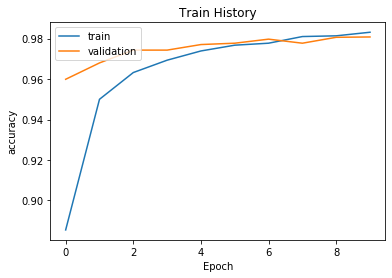

In [154]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

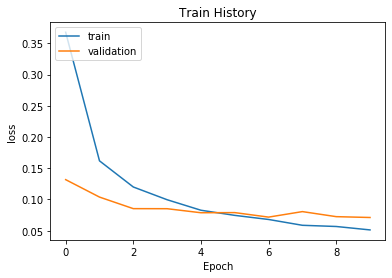

In [155]:
show_train_history(train_history,'loss','val_loss')

In [156]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print("")
print("accuracy = ", scores[1])

10000/10000 [==============================] - 1s 67us/step

accuracy =  0.9824000000953674


In [157]:
prediction = model.predict_classes(x_test)

In [158]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

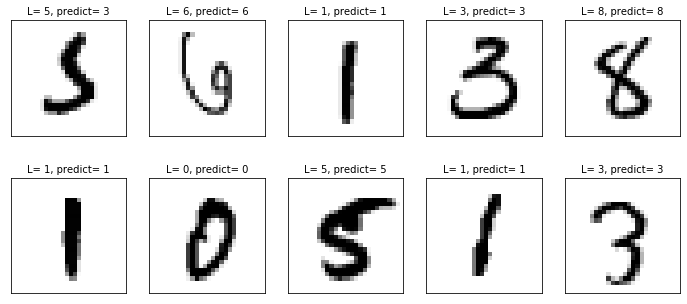

In [159]:
plot_img_label_prediction(x_test_img, y_test_label, prediction, idx=340)

In [160]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,3,0,0,1,2,1,1,0
1,0,1129,2,1,0,0,2,0,1,0
2,0,0,1020,1,1,0,2,7,1,0
3,1,0,3,992,0,5,0,6,2,1
4,1,1,2,0,968,0,3,1,0,6
5,2,0,0,9,0,865,7,2,2,5
6,4,2,1,1,2,2,946,0,0,0
7,1,5,8,2,0,0,0,1008,1,3
8,1,1,7,10,5,4,2,5,934,5


In [161]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})

In [162]:
df[(df.label ==5)&(df.predict ==3)]

,label,predict
340,5,3
1393,5,3
2291,5,3
2526,5,3
2597,5,3
5937,5,3
5972,5,3
5982,5,3
5985,5,3


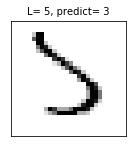

In [163]:
plot_img_label_prediction(x_test_img, y_test_label, prediction, idx=1393, num=1)